In [1]:
from electionsgt import *

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [42]:
import networkx as nx 

In [43]:
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']
plt.rcParams['font.size'] = 14

In [44]:
def chop(expr, *, max=0.1):
    return [i if i > max else 0 for i in expr]

In [45]:
df_sca_i=df_pre[df_pre['ID_DEPARTAMENTO']!=23][partidos_pre+['DEPARTAMENTO']].groupby(df_pre['DEPARTAMENTO']).sum().copy()
df_nor_i=df_sca_i[partidos_pre].div(df_sca_i[partidos_pre].sum(axis=1), axis=0).copy()


In [46]:
try:
    del df_pre_norm
except:
    pass
try:
    del df_dnc_norm
except:
    pass
try:
    del df_ddt_norm
except:
    pass

df_pre_norm=df_pre.copy()
df_pre_norm=df_pre_norm.set_index('MESA').copy()
df_ddt_norm=df_pre.copy()
df_ddt_norm=df_ddt_norm.set_index('MESA').copy()


df_pre_norm=df_pre_norm[df_pre_norm['ID_DEPARTAMENTO']!=23][partidos_pre+['NULOS']].div(df_pre_norm[df_pre_norm['ID_DEPARTAMENTO']!=23][partidos_pre+['NULOS']].sum(axis=1), axis=0).copy()
df_ddt_norm=df_ddt_norm.sort_values(by=['MESA'])[partidos_pre+['NULOS']].div(df_ddt_norm.sort_values(by=['MESA'])[partidos_pre+['NULOS']].sum(axis=1), axis=0).copy()

In [47]:
df_pre.groupby('CENTRO_DE_VOTACIÓN')[partidos_pre+['NULOS']].sum()

,UNE,AZUL,VALOR UNIONISTA,CABAL,TODOS,VAMOS,PHG,PR,PIN,ELEFANTE,...,PPN,UR,URNG-MAIZ WINAQ,CREO,BIEN,VIVA,MI FAMILIA,CAMBIO,VOS,NULOS
CENTRO_DE_VOTACIÓN,,,,,,,,,,,,,,,,,,,,,
1,29,15,162,112,2,15,0,27,1,7,...,1,9,11,28,47,13,18,1,130,78
2,186,49,515,307,7,64,4,55,9,33,...,7,56,63,61,192,128,81,7,426,421
3,167,40,391,231,11,42,4,35,7,23,...,8,46,61,42,196,110,61,5,366,331
4,133,34,449,249,6,59,6,56,10,34,...,4,45,52,29,175,95,59,3,390,293
5,240,68,572,358,5,85,10,65,10,46,...,10,54,74,54,237,160,70,9,539,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,6,2,21,21,1,0,0,2,0,0,...,0,0,5,0,4,6,0,1,15,94
3849,5,1,16,17,0,2,0,1,0,1,...,0,1,1,0,2,5,0,0,20,49
3850,5,0,11,5,0,2,0,0,0,0,...,0,0,2,1,3,7,0,0,18,64


In [48]:
try:
    del df_pre_norm_c
except:
    pass
try:
    del df_dnc_norm_c
except:
    pass
try:
    del df_ddt_norm_c
except:
    pass

df_pre_norm_c=df_pre[df_pre['ID_DEPARTAMENTO']!=23].groupby('CENTRO_DE_VOTACIÓN')[partidos_pre+['NULOS']].sum().copy()
#df_pre_norm_c=df_pre_norm_c.set_index('CENTRO_DE_VOTACIÓN').copy()
df_ddt_norm_c=df_ddt[df_ddt['ID_DEPARTAMENTO']!=23].groupby('CENTRO_DE_VOTACIÓN')[partidos_pre+['NULOS']].sum().copy()
#df_ddt_norm_c=df_ddt_norm_c.set_index('CENTRO_DE_VOTACIÓN').copy()


df_pre_norm_c=df_pre_norm_c.div(df_pre_norm_c.sum(axis=1), axis=0).copy()
df_ddt_norm_c=df_ddt_norm_c.div(df_ddt_norm_c.sum(axis=1), axis=0).copy()

In [49]:
#df_ddt_norm=df_ddt_norm.sort_index().copy()

In [50]:
df_pre_norm.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pre_norm.dropna(inplace=True) 
df_ddt_norm.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ddt_norm.dropna(inplace=True) 

In [51]:
df_pre_norm_c.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pre_norm_c.dropna(inplace=True) 
df_ddt_norm_c.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ddt_norm_c.dropna(inplace=True) 

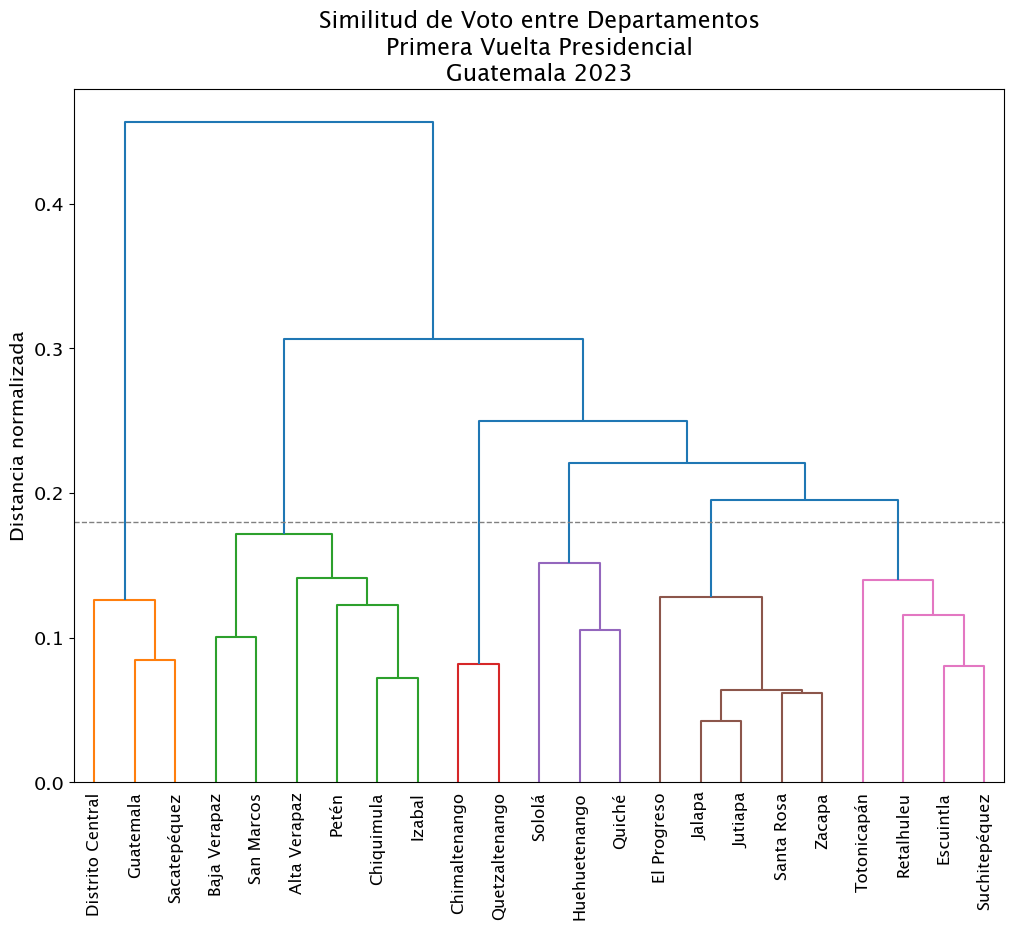

In [52]:
#cluster-geografico

complete_clustering = linkage(df_nor_i, method="complete", metric="euclidean")
average_clustering = linkage(df_nor_i, method="average", metric="euclidean")
single_clustering = linkage(df_nor_i, method="single", metric="euclidean")

max_d = 0.18

dendrogram(complete_clustering, leaf_rotation=90,leaf_font_size=12, labels=df_nor_i.index, color_threshold=max_d)

plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud de Voto entre Departamentos\nPrimera Vuelta Presidencial\nGuatemala 2023')
plt.ylabel("Distancia normalizada")


#plt.savefig('img_dendo_cluster.png', bbox_inches='tight', dpi=300)
#Image.open('img_dendo_cluster.png').save('img_dendo_cluster.jpf')


plt.show()

In [53]:
clusters = fcluster(complete_clustering, max_d, criterion='distance')
depts=list(df_nor_i.index)
group={}
for i in range(max(clusters)):
    group[i+1]=[]

for k in range(len(clusters)):
    group[clusters[k]].append(depts[k])


In [54]:
#flujo entre distritales y presidente por mesa

In [55]:
k=5
mesas=list(set(df_pre[df_pre['DEPARTAMENTO'].isin(group[k])]['MESA']) & set(df_ddt[df_ddt['DEPARTAMENTO'].isin(group[k])]['MESA']))

In [56]:
group[k]

['El Progreso', 'Jalapa', 'Jutiapa', 'Santa Rosa', 'Zacapa']

In [57]:
len(mesas[:-500])

2391

In [58]:
X=df_ddt_norm.iloc[mesas[:-500]].values

In [59]:
domain=list(df_ddt_norm.columns)

In [60]:
label_encoder = LabelEncoder()

In [61]:
missing=[x for x in partidos_pre if x not in df_pre_norm.iloc[mesas[:-500]].idxmax(axis=1).unique()]

In [62]:
ohe = OneHotEncoder()
y_temp=ohe.fit_transform(df_pre_norm.iloc[mesas[:-500]].idxmax(axis=1).values.reshape(-1, 1)).toarray()
y=np.pad(y_temp,((0,0),(0,1)))

In [63]:
labels=np.append(ohe.get_feature_names_out(),missing)

In [64]:
X.shape[1]

23

In [65]:
try:
    del ann
except:
    pass
ann = Sequential()
# Add the input layer and first hidden layer
ann.add(Dense(units=X.shape[1], activation='relu', input_shape=(X.shape[1],)))
# Add the second hidden layer
ann.add(Dense(units=4, activation='relu'))
# Add the output layer
ann.add(Dense(units=y.shape[1], activation='sigmoid'))

In [66]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [67]:
ann.fit(X, y, batch_size = 32, epochs = 350)


Epoch 1/350
75/75 [==============================] - 1s 1ms/step - loss: 0.6504 - accuracy: 0.1547
Epoch 2/350
75/75 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.4626
Epoch 3/350
75/75 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.4981
Epoch 4/350
75/75 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 0.4868
Epoch 5/350
75/75 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.4868
Epoch 6/350
75/75 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.4868
Epoch 7/350
75/75 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.4868
Epoch 8/350
75/75 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.4877
Epoch 9/350
75/75 [==============================] - 0s 1ms/step - loss: 0.1371 - accuracy: 0.5232
Epoch 10/350
75/75 [==============================] - 0s 1ms/step - loss: 0.1341 - accuracy: 0.5801
Epoch 11/

75/75 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9034
Epoch 84/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9059
Epoch 85/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9067
Epoch 86/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9063
Epoch 87/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9076
Epoch 88/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9067
Epoch 89/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.9046
Epoch 90/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9101
Epoch 91/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.9113
Epoch 92/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9084
Epoch 93/350


75/75 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9552
Epoch 246/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9573
Epoch 247/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9573
Epoch 248/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9565
Epoch 249/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9578
Epoch 250/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9578
Epoch 251/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9582
Epoch 252/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9582
Epoch 253/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9582
Epoch 254/350
75/75 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 0.9578
Epoc

In [68]:
X_pred=[]
for j in range(23):
    x_pred=np.zeros(23)
    x_pred[j]=1
    X_pred.append(x_pred)
X_pred=np.array([X_pred])

In [69]:
y_hat=ann.predict(X_pred)

1/1 [==============================] - 0s 106ms/step


In [70]:
graph_labels={}
for i in range(23):
    print(domain[i])
    print(np.argsort(y_hat[0][i])[::-1][:3])
    print(labels[np.argsort(y_hat[0][i])[::-1][:3]])
    top=chop(y_hat[0][i][np.argsort(y_hat[0][i])[::-1][:3]],max=0.5)
    n_top=len([item for item in top if item>0])
    print(chop(y_hat[0][i][np.argsort(y_hat[0][i])[::-1][:3]],max=0.5))
    print('\n')
    try:
        p=[index for index, value in enumerate(labels) if value[3:]==domain[i]][0]
    except:
        p=[index for index, value in enumerate(labels) if value==domain[i]][0]
    graph_labels[p]=domain[i]
    for q in np.argsort(y_hat[0][i])[::-1][:n_top]:
        G.add_edge(p,q) 

UNE
[ 7 11  9]
['x0_UNE' 'x0_VIVA' 'x0_VALOR UNIONISTA']
[1.0, 0, 0]




NameError: name 'G' is not defined

In [ ]:
plt.title('Flujo del voto cruzado entre diputados distritales y presidente\n'+', '.join(group[k])+'\nPrimera Vuelta 2023')
nx.draw(G, 
        #labels=graph_labels, 
        with_labels = True, 
        font_size=14, 
        node_size=500, 
        arrowsize=14, 
        edge_color='gray'
       )
for i in range(len(list(graph_labels))):
    plt.plot([], [], ' ', label=str(i)+'-'+graph_labels[i])
#plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show() 

In [82]:
#clasificacion de partidos por grupo por centro
k=2
centros=list(set(df_pre[df_pre['DEPARTAMENTO'].isin(group[k])]['CENTRO_DE_VOTACIÓN']) & set(df_ddt[df_ddt['DEPARTAMENTO'].isin(group[k])]['CENTRO_DE_VOTACIÓN']))[:100]
X=df_ddt_norm_c.iloc[centros].values
domain=list(df_ddt_norm_c.columns)
missing=[x for x in partidos_pre if x not in df_pre_norm_c.iloc[centros].idxmax(axis=1).unique()]
ohe = OneHotEncoder()
y_temp=ohe.fit_transform(df_pre_norm_c.iloc[centros].idxmax(axis=1).values.reshape(-1, 1)).toarray()
y=np.pad(y_temp,((0,0),(0,1)))
labels=np.append(ohe.get_feature_names_out(),missing)
try:
    del ann
except:
    pass
ann = Sequential()
# Add the input layer and first hidden layer
ann.add(Dense(units=X.shape[1], activation='relu', input_shape=(X.shape[1],)))
# Add the second hidden layer
ann.add(Dense(units=4, activation='relu'))
# Add the output layer
ann.add(Dense(units=y.shape[1], activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X, y, batch_size = 32, epochs = 500)


In [83]:
X_pred=[]
for j in range(23):
    x_pred=np.zeros(23)
    x_pred[j]=1
    X_pred.append(x_pred)
X_pred=np.array([X_pred])
y_hat=ann.predict(X_pred)

In [84]:
try:
    del df_prob_c
except:
    pass

df_prob_c=pd.DataFrame(0,columns=partidos_pre+['NULOS'], index=partidos_pre+["NULOS"])
for i in range(23):
    for j in range(len(y_temp[0])):
        part=labels[j][3:]
        df_prob_c.loc[domain[i],part]=y_hat[0][i][j]

In [85]:
try:
    del df_dist_c
except:
    pass

df_dist_c=pd.DataFrame(0,columns=partidos_pre+['NULOS'], index=partidos_pre+["NULOS"])
for i in range(23):
    for j in range(23):
        df_dist_c.loc[domain[i],domain[j]]=(1-df_prob_c.loc[domain[i],domain[j]])*(1-df_prob_c.loc[domain[j],domain[i]])
for i in range(23):
    df_dist_c.loc[domain[i],domain[i]]=0

In [86]:
complete_clustering = linkage(df_dist_c, method="complete", metric="euclidean")
average_clustering = linkage(df_dist_c, method="average", metric="euclidean")
single_clustering = linkage(df_dist_c, method="single", metric="euclidean")

max_d = 1.8

dendrogram(complete_clustering, leaf_rotation=90,leaf_font_size=12, labels=df_dist_c.index, color_threshold=max_d)

plt.axhline(y=max_d, c='grey', lw=1, linestyle='dashed')
plt.title('Similitud de Voto entre Partidos\n'+', '.join(group[k])+'\nPrimera Vuelta Guatemala 2023')
plt.ylabel("Distancia normalizada")


#plt.savefig('img_dendo_cluster.png', bbox_inches='tight', dpi=300)
#Image.open('img_dendo_cluster.png').save('img_dendo_cluster.jpf')


plt.show()